In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('seaborn')

In [36]:
data = pd.read_csv('emails.csv', nrows = 3000)
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [37]:
data['text'][4]

"Subject: do not have money , get software cds from here !  software compatibility . . . . ain ' t it great ?  grow old along with me the best is yet to be .  all tradgedies are finish ' d by death . all comedies are ended by marriage ."

In [22]:
labels_data = data['spam'].value_counts()
labels_data

0    1632
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

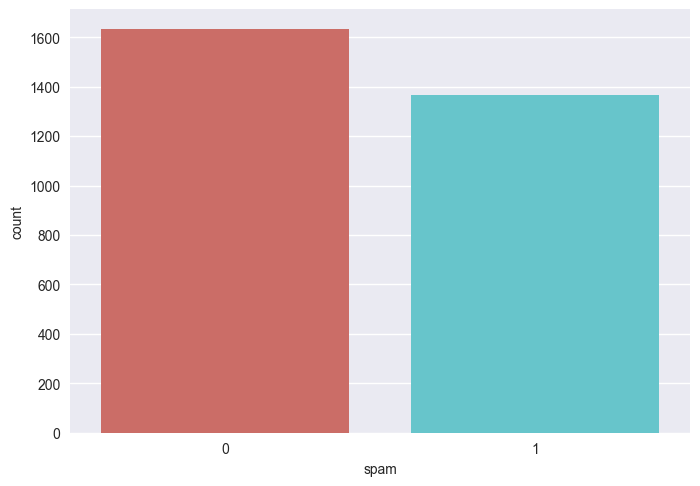

In [23]:
sns.countplot(x = 'spam', data = data, palette='hls')

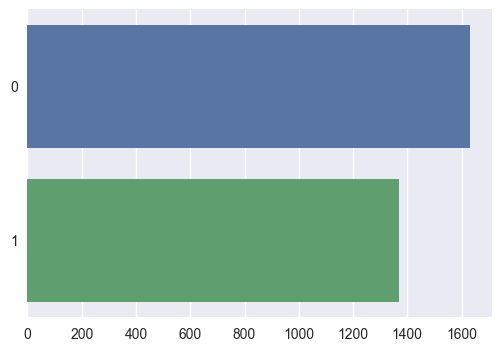

In [24]:
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(y = labels_data.index, x = labels_data.values, orient = 'h', ax = ax)
plt.show()

In [25]:
# common words = stop word

In [26]:
# !python -m spacy download en_core_web_sm

In [27]:
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [28]:
for tokens in nlp('data'):
    print(tokens.text, tokens.lemma_)

data datum


In [29]:
def basicpreprocessing(text: pd.Series)->pd.Series:
    '''
    Apply the following steps
    1. Lower case the data
    2. Remove the stop
    3. Remove the special characters
    
    returns: text: cleaned: pd.Series
    '''
    text = text.apply(lambda x: x[8:])
    text = text.apply(lambda x: x.lower())
    text = text.apply(lambda x: ' '.join([tokens.lemma_ for tokens in nlp(x)
                                          if tokens.text not in 
                                          nlp.Defaults.stop_words]))
    text = text.str.replace(r'[^a-z|^\S]',' ', regex = True)
    text = text.apply(lambda x: ' '.join([tokens for tokens in x.split()]))
    return text
                      

In [30]:
data['text'] = basicpreprocessing(data['text'])

In [31]:
data['text']

0       naturally irresistible corporate identity lt h...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new home easy m want homeowner pr...
3       4 color printing special request additional in...
4       money , software cd ! software compatibility ....
                              ...                        
2995    : - time work vince , zimin talk briefly - tim...
2996    : congratulation vince , congratulation ! mind...
2997    : risk ' s advanced stress testing course dear...
2998    : enron / stanford program vince , manage chan...
2999    breckenridge offsite hello : fyi . breckenridg...
Name: text, Length: 3000, dtype: object

In [32]:
data['text'][4]

"money , software cd ! software compatibility . . . . ain ' t great ? grow old good . tradgedie finish ' d death . comedy end marriage ."

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000)
data_tfidf = tfidf.fit_transform(data['text'])
data_tfidf

<3000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 211853 stored elements in Compressed Sparse Row format>

In [14]:
data_tfidf_df = pd.DataFrame(data_tfidf.toarray(), columns = tfidf.get_feature_names_out())
data_tfidf_df

,00,000,0000,001,0011,01,011,0171,02,020,...,zero,zesto,zhang,zhendong,zimbabwe,zimin,zip,ziplip,zipter,zone
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.029122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037899,0.0,0.0,0.0,0.0
2996,0.000000,0.000000,0.0,0.0,0.0,0.094708,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2997,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2998,0.030143,0.034642,0.0,0.0,0.0,0.000000,0.0,0.0,0.033265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
# textre = re.sub('[^A-z|a-z]',' ',data1)
# ' '.join(textre.)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_tfidf, data['spam'], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [19]:
from sklearn.model_selection import cross_val_score
logcv = cross_val_score(logreg, data_tfidf_df, data['spam'], cv = 5)
print(logcv.mean())


0.985


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[446,   3],
       [ 13, 438]], dtype=int64)

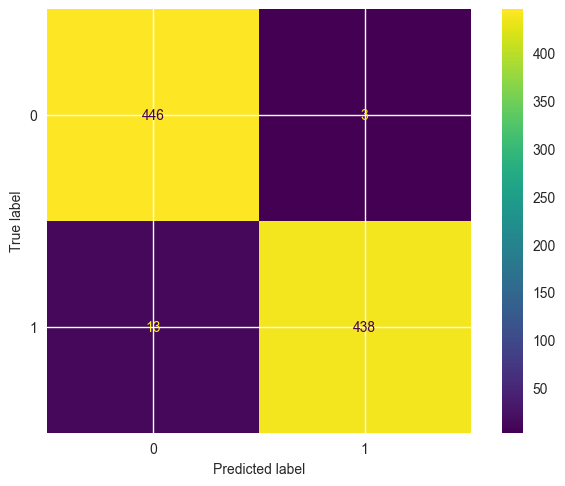

In [21]:
ConfusionMatrixDisplay(confusion_matrix).plot()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       449
           1       0.99      0.97      0.98       451

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [23]:
  from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print(thresholds.mean())

0.5106293260915614


Spam Text message Detection using spacy

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('seaborn')

In [9]:
text = pd.read_csv('SPAM text message 20170820 - Data.csv')
text.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
counts = text['Category'].value_counts()
counts

ham     4825
spam     747
Name: Category, dtype: int64

In [11]:
count_percentage = counts.values/counts.values.sum()
count_percentage*100

array([86.5936827, 13.4063173])

<Axes: xlabel='count', ylabel='Category'>

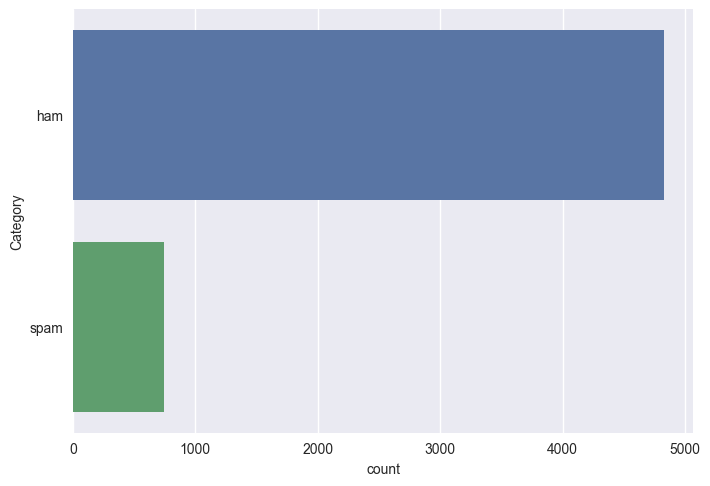

In [12]:
sns.countplot(data = text, y = 'Category', orient = 'h')

In [13]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm')


In [18]:
def basciPreprocessing(msg: pd.Series)->pd.Series:
    msg = msg.apply(lambda x: x.lower())
    msg = msg.apply(lambda x: ' '.join([token.lemma_ for token in nlp(x) if token.text not in nlp.Defaults.stop_words]))
    msg = msg.str.replace(r'[^a-z|^\S]',' ', regex = True)
    msg = msg.apply(lambda x: ' '.join([token for token in x.split()]))
    return msg

In [19]:
text['Message'] = basciPreprocessing(text['Message'])
text['Message']

0       jurong point , crazy .. available bugis n grea...
1                           ok lar ... joke wif u oni ...
2       free entry 2 wkly comp win fa cup final tkts 2...
3                             u dun early hor ... u c ...
4                                    nah think usf , live
                              ...                        
5567    2nd time try 2 contact u. u win £ 750 pound pr...
5568                              ü b esplanade fr home ?
5569                     pity , * mood . ... suggestion ?
5570          guy bitch act like interested buy week free
5571                                          rofl . true
Name: Message, Length: 5572, dtype: object

In [38]:
 text['Message'][4]

'nah think usf , live'

In [61]:
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [69]:
text11 = data['text'][4] 
text = text11[9:]
text = text.lower()

print(text)
text = ' '.join([tokens.lemma_ for tokens in nlp(text) if tokens.text not in nlp.Defaults.stop_words])
print(text)
text = re.sub(r'[^a-z|^\s]',' ', text)
print(text)
text = ' '.join([tokens for tokens in text.split()])
print(text)

do not have money , get software cds from here !  software compatibility . . . . ain ' t it great ?  grow old along with me the best is yet to be .  all tradgedies are finish ' d by death . all comedies are ended by marriage .
money , software cd !   software compatibility . . . . ain ' t great ?   grow old good .   tradgedie finish ' d death . comedy end marriage .
money   software cd     software compatibility         ain   t great     grow old good     tradgedie finish   d death   comedy end marriage  
money software cd software compatibility ain t great grow old good tradgedie finish d death comedy end marriage
